In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from timeit import default_timer as timer
from sklearn.model_selection import GridSearchCV

In [3]:
bookings = pd.read_csv(r'C:\Users\bellcsa\OneDrive - Lam Research\hotel_bookings_original.csv')

bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
bookings.fillna({'children' : 0, 'country' : 'N. A.', 'agent' : 0, 'company' : 0}, inplace = True)

In [6]:
bookings.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [7]:
bookings.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,74.828319,10.775157,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,107.141953,53.943884,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,0.000000,0.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,7.000000,0.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,9.000000,0.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,152.000000,0.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [8]:
def average_stay_days():
    stay = bookings.loc[bookings.is_canceled == 0, ['hotel', 'stays_in_week_nights', 'stays_in_weekend_nights']] 
    stay['nights'] = stay.stays_in_week_nights + stay.stays_in_weekend_nights    
    stay = stay.groupby('hotel').agg({'nights' : 'mean'})
    
    return stay

average_stay_days()

,nights
hotel,
City Hotel,2.923618
Resort Hotel,4.142892


In [9]:
bookings.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005036,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.046529,-0.082995,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.012640,-0.086250,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.056463,0.033882,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.018244,-0.032750,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014553,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.000202,0.003724,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045794,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.161427,-0.079977,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.195135,-0.043641,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,0.024994,-0.166778,-0.008283,0.230641,0.014785,0.122884
children,0.005036,-0.037613,0.054636,0.005515,0.014553,0.045794,0.044203,0.030440,1.000000,0.024030,-0.032858,-0.024729,-0.021072,0.048952,0.050581,-0.042622,-0.033271,0.324853,0.056255,0.081736
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.030266,-0.009459,-0.010621,0.029186,0.037383,0.097889


<AxesSubplot:>

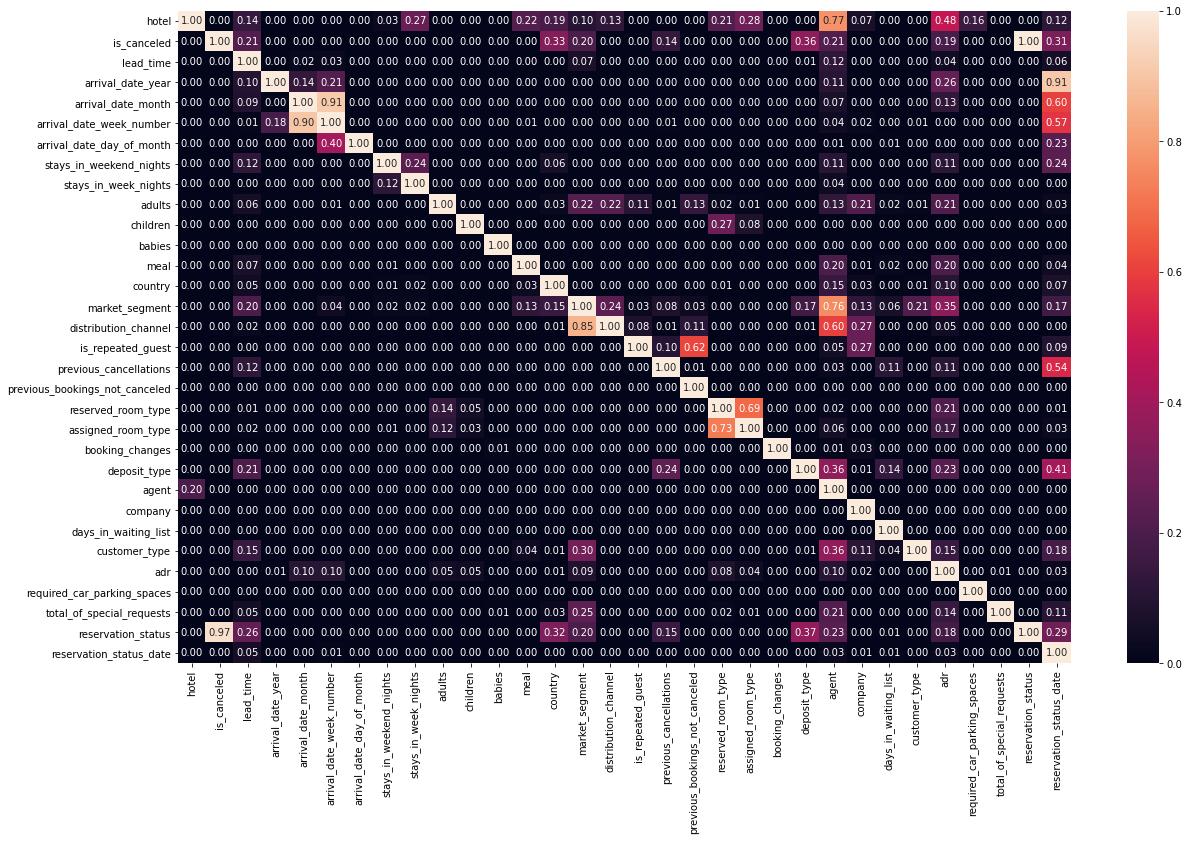

In [10]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
from collections import Counter


warnings.filterwarnings("ignore")
plt.figure(figsize=(20,12))
sns.heatmap(pps.matrix(bookings),annot=True,fmt=".2f")

In [11]:
bookings.corr()['is_canceled'].abs().sort_values(ascending = False)

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
company                           0.082995
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
agent                             0.046529
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005036
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

In [12]:
bookings.groupby(['is_canceled', 'lead_time']).count()['hotel']

is_canceled  lead_time
0            0            5915
             1            3139
             2            1856
             3            1634
             4            1539
                          ... 
1            608            17
             615            17
             622            17
             626            30
             629            17
Name: hotel, Length: 887, dtype: int64

In [13]:
bookings.groupby(['is_canceled', 'total_of_special_requests']).agg({'hotel' : 'count'})

hotel
is_canceled total_of_special_requests       
0           0                          36762
            1                          25908
            2                          10103
            3                           2051
            4                            304
            5                             38
1           0                          33556
            1                           7318
            2                           2866
            3                            446
            4                             36
            5                              2

In [14]:
bookings.groupby(['is_canceled', 'required_car_parking_spaces']).agg({'hotel' : 'count'})

hotel
is_canceled required_car_parking_spaces       
0           0                            67750
            1                             7383
            2                               28
            3                                3
            8                                2
1           0                            44224

In [15]:
bookings.groupby(['is_canceled', 'booking_changes']).agg({'hotel' : 'count'})

hotel
is_canceled booking_changes       
0           0                59923
            1                10894
            2                 3039
            3                  783
            4                  309
            5                   98
            6                   45
            7                   28
            8                   13
            9                    7
            10                   5
            11                   2
            12                   2
            13                   5
            14                   4
            15                   3
            16                   1
            17                   2
            18                   1
            20                   1
            21                   1
1           0                41391
            1                 1807
            2                  766
            3                  144
            4                   67
            5                   20
            6                   18
            7                    3
            8                    4
            9                    1
            10                   1
            14                   1
            16                   1

In [16]:
bookings.groupby(['is_canceled', 'previous_cancellations']).agg({'hotel' : 'count'})

hotel
is_canceled previous_cancellations       
0           0                       74624
            1                         337
            2                          78
            3                          45
            4                          24
            5                          17
            6                          15
            11                         25
            13                          1
1           0                       38282
            1                        5714
            2                          38
            3                          20
            4                           7
            5                           2
            6                           7
            11                         10
            13                         11
            14                         14
            19                         19
            21                          1
            24                         48
            25                         25
            26                         26

In [30]:
variables = ['total_of_special_requests',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces']

In [31]:
model = RandomForestClassifier(n_estimators = 1000, max_depth = 20, n_jobs = -1, 
                               random_state = 0, bootstrap = True)

#using KFold validation to try to increase the accuracy
def kfold_validation(bookings, variables, k, shuffle = False):
    i = 1

    kfold = KFold(n_splits = k, shuffle = shuffle)

    for i_train, i_test in kfold.split(bookings):
        data = bookings.loc[i_train, variables]
        target = bookings.loc[i_train, 'is_canceled']

        model.fit(data, target)

        data = bookings.loc[i_test, variables]
        target = bookings.loc[i_test, 'is_canceled']

        predicted = model.predict(data)

        print(53 * '-' + f'\nFold {i} | train: {len(i_train)} | test: {len(i_test)}')
        print(metrics.classification_report(target, predicted))
        print(metrics.confusion_matrix(target, predicted))

        i += 1
        
    return kfold

kfold_validation(bookings, variables, 5, True)

-----------------------------------------------------
Fold 1 | train: 95512 | test: 23878
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     15040
           1       0.87      0.71      0.78      8838

    accuracy                           0.85     23878
   macro avg       0.86      0.83      0.84     23878
weighted avg       0.86      0.85      0.85     23878

[[14100   940]
 [ 2525  6313]]
-----------------------------------------------------
Fold 2 | train: 95512 | test: 23878
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     15005
           1       0.86      0.72      0.78      8873

    accuracy                           0.85     23878
   macro avg       0.85      0.82      0.83     23878
weighted avg       0.85      0.85      0.85     23878

[[13985  1020]
 [ 2523  6350]]
-----------------------------------------------------
Fold 3 | train: 95512 | test: 23878
              

KFold(n_splits=5, random_state=None, shuffle=True)

In [32]:
predicted = model.predict(data)

print(metrics.classification_report(target, predicted))
print(metrics.confusion_matrix(target, predicted))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     75166
           1       0.92      0.82      0.86     44224

    accuracy                           0.90    119390
   macro avg       0.91      0.89      0.90    119390
weighted avg       0.91      0.90      0.90    119390

[[71875  3291]
 [ 8106 36118]]


<AxesSubplot:>

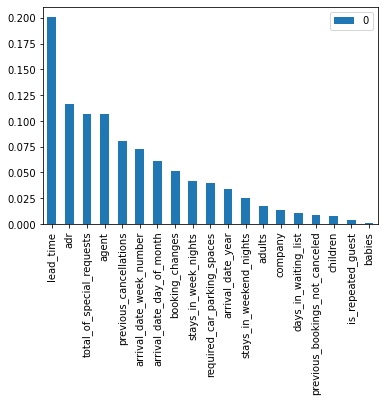

In [39]:
importances = list(zip(model.feature_importances_, variables))
importances.sort(reverse=True)
pd.DataFrame(importances, index=[x for (_,x) in importances]).plot(kind = 'bar')